# nasaPoly Examples

In [1]:
import nasaPoly

Water = nasaPoly.Species('H2O(L)')


Species Name: H2O(L)
Data Source: COX ET.AL.,CODATA KEY VALUES FOR THERMODYNAMICS.1989.
Molecular wt: 18.01528 g/mol
Valid temperature range(s): (273.15, 600.0)



In [2]:
from ipywidgets import interact

@interact(T=(200,650,10))
def State(T=300):
    Water.printState(T)

interactive(children=(IntSlider(value=300, description='T', max=650, min=200, step=10), Output()), _dom_classe…

We can double check that we can recover h_0 by integrating cp_0 dT

In [3]:
from scipy.integrate import quad

T_test = 400 # K

h_0_integration = quad(Water.cp_0, 298.15, T_test)[0]
print(h_0_integration)

h_0_nasa = Water.h_0(T_test) - Water.h_0(298.15)
print(h_0_nasa)

7709.366483074944
7709.366483071062


Some plotting:


Species Name: H2O
Data Source: CODATA 1989. JRNBS 1987 v92 p35. TRC tuv-25 10/88.
Molecular wt: 18.01528 g/mol
Valid temperature range(s): (200.0, 1000.0), (1000.0, 6000.0)


Species Name: H2
Data Source: Hydrogen. TPIS, v1, pt2, 1978, pp31-32.
Molecular wt: 2.01588 g/mol
Valid temperature range(s): (200.0, 1000.0), (1000.0, 6000.0), (6000.0, 20000.0)


Species Name: CO2
Data Source: Props & Hf298: TPIS v2,pt1,1991,p27.
Molecular wt: 44.0095 g/mol
Valid temperature range(s): (200.0, 1000.0), (1000.0, 6000.0), (6000.0, 20000.0)


Species Name: N2
Data Source: TPIS 1978 v1 pt2 p207.
Molecular wt: 28.01348 g/mol
Valid temperature range(s): (200.0, 1000.0), (1000.0, 6000.0), (6000.0, 20000.0)



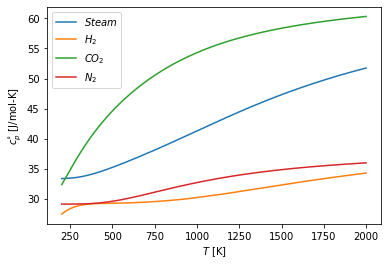

In [9]:
import matplotlib.pyplot as plt
import numpy as np

Steam = nasaPoly.Species('H2O')
H2 = nasaPoly.Species('H2')
CO2 = nasaPoly.Species('CO2')
N2 = nasaPoly.Species('N2')

T_range = np.linspace(200, 2000, 250)
plt.plot(T_range, [Steam.cp_0(T) for T in T_range], label='$Steam$')
plt.plot(T_range, [H2.cp_0(T) for T in T_range], label='$H_2$')
plt.plot(T_range, [CO2.cp_0(T) for T in T_range], label='$CO_2$')
plt.plot(T_range, [N2.cp_0(T) for T in T_range], label='$N_2$')
plt.legend()
plt.xlabel('$T$ [K]')
plt.ylabel('$c_{p}^{\circ}$ [J/mol-K]')
plt.show()